In [93]:
from pathlib import Path

import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import seml
from matplotlib import pyplot as plt

matplotlib.style.use("fivethirtyeight")
matplotlib.style.use("seaborn-talk")
matplotlib.rcParams["font.family"] = "monospace"
plt.rcParams["savefig.facecolor"] = "white"
sns.set_context("poster")
pd.set_option("display.max_columns", 100)

In [94]:
results = seml.get_results(
    "baseline_comparison",
    to_data_frame=True,
    fields=["config", "result", "seml", "config_hash"],
    states=["COMPLETED"],
    filter_dict={
        "batch_id": 2,
        # "config.dataset.data_params.split_key": "split_ood_finetuning",  # split_ood_finetuning, split_random, split_ho_pathway, split_ho_epigenetic, split_ho_epigenetic_all
        # "config.model.append_ae_layer": False,
    },
)

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

In [95]:
results

,_id,config_hash,seml.executable,seml.name,seml.output_dir,seml.conda_environment,seml.working_dir,seml.source_files,seml.output_file,seml.command,seml.temp_dir,config.overwrite,config.db_collection,config.dataset.data_params.covariate_keys,config.dataset.data_params.dataset_path,config.dataset.data_params.degs_key,config.dataset.data_params.dose_key,config.dataset.data_params.pert_category,config.dataset.data_params.perturbation_key,config.dataset.data_params.smiles_key,config.dataset.data_params.split_key,config.dataset.data_params.use_drugs_idx,config.dataset.dataset_type,config.model.additional_params.decoder_activation,config.model.additional_params.doser_type,config.model.additional_params.patience,config.model.additional_params.seed,config.model.append_ae_layer,config.model.embedding.directory,config.model.embedding.model,config.model.enable_cpa_mode,config.model.hparams.adversary_depth,config.model.hparams.adversary_lr,config.model.hparams.adversary_steps,config.model.hparams.adversary_wd,config.model.hparams.adversary_width,config.model.hparams.autoencoder_depth,config.model.hparams.autoencoder_lr,config.model.hparams.autoencoder_wd,config.model.hparams.autoencoder_width,config.model.hparams.batch_size,config.model.hparams.dim,config.model.hparams.dosers_lr,config.model.hparams.dosers_wd,config.model.hparams.dropout,config.model.hparams.penalty_adversary,config.model.hparams.reg_adversary,config.model.hparams.reg_adversary_cov,config.model.hparams.reg_multi_task,config.model.hparams.step_size_lr,config.model.load_pretrained,config.model.pretrained_model_hashes.grover_base,config.model.pretrained_model_hashes.jtvae,config.model.pretrained_model_hashes.rdkit,config.model.pretrained_model_path,config.profiling.outdir,config.profiling.run_profiler,config.training.checkpoint_freq,config.training.full_eval_during_train,config.training.max_minutes,config.training.num_epochs,config.training.run_eval_disentangle,config.training.run_eval_logfold,config.training.run_eval_r2,config.training.run_eval_r2_sc,config.training.save_checkpoints,config.training.save_dir,config.seed,result.epoch,result.stats_epoch,result.loss_reconstruction,result.loss_adv_drugs,result.loss_adv_covariates,result.penalty_adv_drugs,result.penalty_adv_covariates,result.loss_multi_task,result.elapsed_time_min,result.perturbation disentanglement,result.optimal for perturbations,result.covariate disentanglement,result.optimal for covariates,result.training,result.test,result.ood,result.total_epochs,config.model.hparams.dosers_depth,config.model.hparams.dosers_width,config.model.hparams.embedding_encoder_depth,config.model.hparams.embedding_encoder_width
0,31,96d3890fc29f6e455789656994b5c4c9,chemCPA/experiments_run.py,👾_baseline_comparison,/storage/groups/ml01/projects/2021_chemicalCPA...,chemical_CPA,/home/icb/leon.hetzel/git/chemCPA_v2,"[[chemCPA/helper.py, 62e2fce8fa3fbde255b4ec49]...",/storage/groups/ml01/projects/2021_chemicalCPA...,python chemCPA/experiments_run.py with 'datase...,/tmp/19fc23e2-64cb-4606-ba3c-ac28dcfeb41c,31,baseline_comparison,cell_type,project_folder/datasets/adata_baseline.h5ad,lincs_DEGs,dose,cov_drug_dose_name,condition,SMILES,split_baseline_A549,True,trapnell,ReLU,sigm,50,1337,False,project_folder/embeddings,vanilla,True,4,0.000364,2,7.459343e-07,64,4,0.000561,1.329292e-07,256,32,32,0.000561,1.329292e-07,0.262378,0.199070,3.981399,8.605035,0,50,False,ff420aea264fca7668ecb147f60762a1,a7060ac4e2c6154e64a13acd414cbba2,4f061dbfc7af05cf84f06a724b0c8563,project_folder/checkpoints,./,False,25,False,1200,201,True,False,True,False,True,project_folder/sweeps/checkpoints,471381438,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[200],"[-3453.582336165011, -4077.796943890862, -4210...","[15716.220527172089, 15449.003170967102, 15421...","[3090.934080094099, 3165.451872766018, 3244.01...","[33.478628728966214, 0.08227310342203964, 0.06...","[11.43643051199615, 3.3940925523638725, 1.2882...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",

In [96]:
results["config.model.embedding.model"].value_counts()

rdkit      60
vanilla    30
Name: config.model.embedding.model, dtype: int64

In [97]:
pd.crosstab(
    results["config.model.embedding.model"],
    results["result.perturbation disentanglement"].isnull(),
)

result.perturbation disentanglement,False
config.model.embedding.model,
rdkit,60
vanilla,30


In [98]:
[c for c in results.columns if "ae" in c]

['config.model.append_ae_layer', 'config.model.pretrained_model_hashes.jtvae']

In [99]:
pd.crosstab(
    results["config.dataset.data_params.split_key"],
    results["config.model.load_pretrained"],
)


config.model.load_pretrained,False,True
config.dataset.data_params.split_key,,
split_baseline_A549,20,10
split_baseline_K562,20,10
split_baseline_MCF7,20,10


In [100]:
pd.crosstab(
    results["config.dataset.data_params.split_key"],
    results["result.loss_reconstruction"].isnull(),
)

result.loss_reconstruction,False
config.dataset.data_params.split_key,
split_baseline_A549,30
split_baseline_K562,30
split_baseline_MCF7,30


In [101]:
results.isnull().any()[results.isnull().any()]

config.model.hparams.dosers_depth               True
config.model.hparams.dosers_width               True
config.model.hparams.embedding_encoder_depth    True
config.model.hparams.embedding_encoder_width    True
dtype: bool

In [102]:
clean_id = results.loc[~results["result.training"].isnull(), "_id"]

In [103]:
results_clean = results[results._id.isin(clean_id)].copy()
print(f"Percentage of invalid (nan) runs: {1 - len(clean_id) / len(results)}")

Percentage of invalid (nan) runs: 0.0


In [104]:
results_clean["config.model.embedding.model"].value_counts()

rdkit      60
vanilla    30
Name: config.model.embedding.model, dtype: int64

In [105]:
get_mean = lambda x: np.array(x)[-1, 0]
get_mean_de = lambda x: np.array(x)[-1, 1]

results_clean["result.training_mean"] = results_clean["result.training"].apply(get_mean)
results_clean["result.training_mean_de"] = results_clean["result.training"].apply(
    get_mean_de
)
results_clean["result.val_mean"] = results_clean["result.test"].apply(get_mean)
results_clean["result.val_mean_de"] = results_clean["result.test"].apply(get_mean_de)
results_clean["result.test_mean"] = results_clean["result.ood"].apply(get_mean)
results_clean["result.test_mean_de"] = results_clean["result.ood"].apply(get_mean_de)
results_clean["result.perturbation disentanglement"] = results_clean[
    "result.perturbation disentanglement"
].apply(lambda x: x[0])
results_clean["result.covariate disentanglement"] = results_clean[
    "result.covariate disentanglement"
].apply(lambda x: x[0][0])
results_clean["result.final_reconstruction"] = results_clean[
    "result.loss_reconstruction"
].apply(lambda x: x[-1])

results_clean.head(3)

,_id,config_hash,seml.executable,seml.name,seml.output_dir,seml.conda_environment,seml.working_dir,seml.source_files,seml.output_file,seml.command,seml.temp_dir,config.overwrite,config.db_collection,config.dataset.data_params.covariate_keys,config.dataset.data_params.dataset_path,config.dataset.data_params.degs_key,config.dataset.data_params.dose_key,config.dataset.data_params.pert_category,config.dataset.data_params.perturbation_key,config.dataset.data_params.smiles_key,config.dataset.data_params.split_key,config.dataset.data_params.use_drugs_idx,config.dataset.dataset_type,config.model.additional_params.decoder_activation,config.model.additional_params.doser_type,config.model.additional_params.patience,config.model.additional_params.seed,config.model.append_ae_layer,config.model.embedding.directory,config.model.embedding.model,config.model.enable_cpa_mode,config.model.hparams.adversary_depth,config.model.hparams.adversary_lr,config.model.hparams.adversary_steps,config.model.hparams.adversary_wd,config.model.hparams.adversary_width,config.model.hparams.autoencoder_depth,config.model.hparams.autoencoder_lr,config.model.hparams.autoencoder_wd,config.model.hparams.autoencoder_width,config.model.hparams.batch_size,config.model.hparams.dim,config.model.hparams.dosers_lr,config.model.hparams.dosers_wd,config.model.hparams.dropout,config.model.hparams.penalty_adversary,config.model.hparams.reg_adversary,config.model.hparams.reg_adversary_cov,config.model.hparams.reg_multi_task,config.model.hparams.step_size_lr,config.model.load_pretrained,config.model.pretrained_model_hashes.grover_base,config.model.pretrained_model_hashes.jtvae,config.model.pretrained_model_hashes.rdkit,config.model.pretrained_model_path,config.profiling.outdir,config.profiling.run_profiler,config.training.checkpoint_freq,config.training.full_eval_during_train,config.training.max_minutes,config.training.num_epochs,config.training.run_eval_disentangle,config.training.run_eval_logfold,config.training.run_eval_r2,config.training.run_eval_r2_sc,config.training.save_checkpoints,config.training.save_dir,config.seed,result.epoch,result.stats_epoch,result.loss_reconstruction,result.loss_adv_drugs,result.loss_adv_covariates,result.penalty_adv_drugs,result.penalty_adv_covariates,result.loss_multi_task,result.elapsed_time_min,result.perturbation disentanglement,result.optimal for perturbations,result.covariate disentanglement,result.optimal for covariates,result.training,result.test,result.ood,result.total_epochs,config.model.hparams.dosers_depth,config.model.hparams.dosers_width,config.model.hparams.embedding_encoder_depth,config.model.hparams.embedding_encoder_width,result.training_mean,result.training_mean_de,result.val_mean,result.val_mean_de,result.test_mean,result.test_mean_de,result.final_reconstruction
0,31,96d3890fc29f6e455789656994b5c4c9,chemCPA/experiments_run.py,👾_baseline_comparison,/storage/groups/ml01/projects/2021_chemicalCPA...,chemical_CPA,/home/icb/leon.hetzel/git/chemCPA_v2,"[[chemCPA/helper.py, 62e2fce8fa3fbde255b4ec49]...",/storage/groups/ml01/projects/2021_chemicalCPA...,python chemCPA/experiments_run.py with 'datase...,/tmp/19fc23e2-64cb-4606-ba3c-ac28dcfeb41c,31,baseline_comparison,cell_type,project_folder/datasets/adata_baseline.h5ad,lincs_DEGs,dose,cov_drug_dose_name,condition,SMILES,split_baseline_A549,True,trapnell,ReLU,sigm,50,1337,False,project_folder/embeddings,vanilla,True,4,0.000364,2,7.459343e-07,64,4,0.000561,1.329292e-07,256,32,32,0.000561,1.329292e-07,0.262378,0.199070,3.981399,8.605035,0,50,False,ff420aea264fca7668ecb147f60762a1,a7060ac4e2c6154e64a13acd414cbba2,4f061dbfc7af05cf84f06a724b0c8563,project_folder/checkpoints,./,False,25,False,1200,201,True,False,True,False,True,project_folder/sweeps/checkpoints,471381438,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[200],"[-3453.582336165011, -4077.796943890862, -4210...","[15716.220527172089, 15449.003170967102, 15421...","[3090.934080094099, 3165.451872766018, 3244.01...","[33.478628

In [106]:
[c for c in results_clean.columns if "pretrain" in c]

results_clean[
    [
        "config.model.embedding.model",
        "config.model.load_pretrained",
        "config.dataset.data_params.split_key",
    ]
].drop_duplicates()

,config.model.embedding.model,config.model.load_pretrained,config.dataset.data_params.split_key
0,vanilla,False,split_baseline_A549
10,vanilla,False,split_baseline_K562
20,vanilla,False,split_baseline_MCF7
30,rdkit,True,split_baseline_A549
40,rdkit,False,split_baseline_A549
50,rdkit,True,split_baseline_K562
60,rdkit,False,split_baseline_K562
70,rdkit,True,split_baseline_MCF7
80,rdkit,False,split_baseline_MCF7


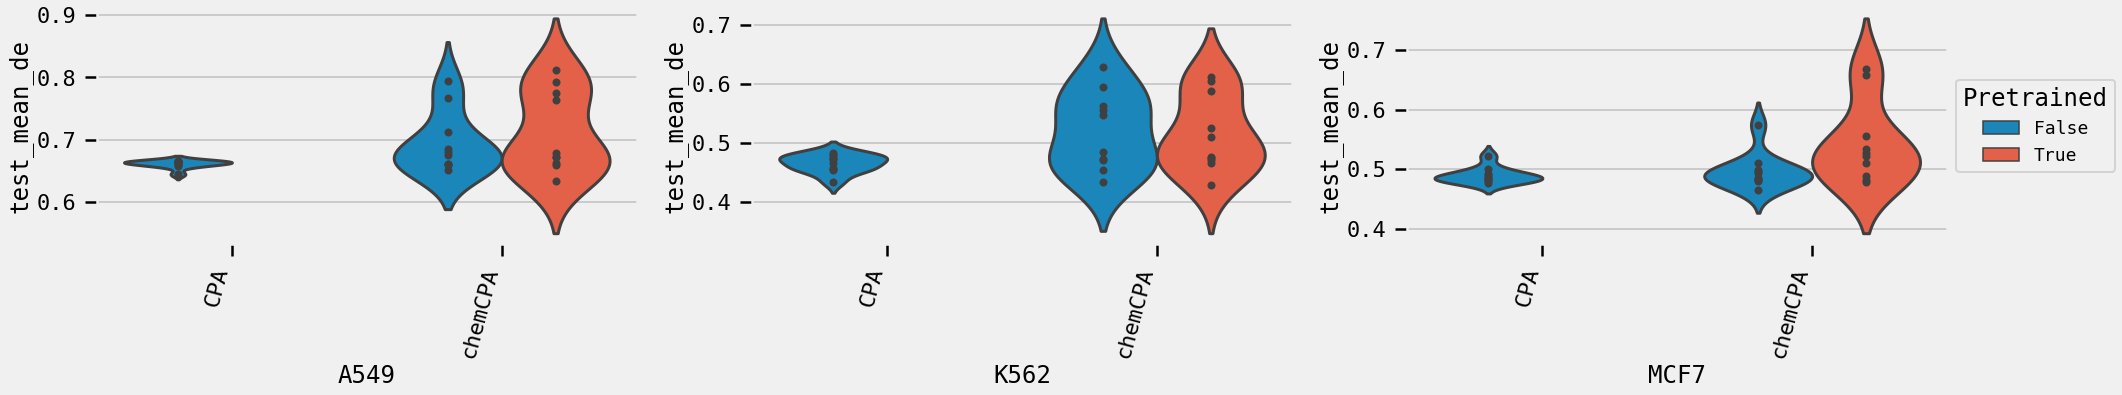

In [107]:
rows, cols = 1, 3
fig, ax = plt.subplots(rows, cols, figsize=(10 * cols, 6 * rows))

# for i, y in enumerate(
#     ("result.training_mean_de", "result.val_mean_de", "result.test_mean_de")
# ):
for i, y in enumerate(
    ("split_baseline_A549", "split_baseline_K562", "split_baseline_MCF7")
):
    sns.violinplot(
        data=results_clean[results_clean["config.dataset.data_params.split_key"]==y],
        x="config.model.embedding.model",
        y="result.test_mean_de",
        hue="config.model.load_pretrained",
        inner="points",
        ax=ax[i],
        scale="width",
    )
    # ax[i].set_ylim([0.3,1.01])
    ax[i].set_xticklabels(['CPA', 'chemCPA'])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=75, ha="right")
    ax[i].set_xlabel(y.split("_")[-1])
    ax[i].set_ylabel('test_mean_de')
    ax[i].legend(title="Pretrained", loc="lower right", fontsize=18, title_fontsize=24)

ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].legend(
    title="Pretrained",
    fontsize=18,
    title_fontsize=24,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)
plt.tight_layout()

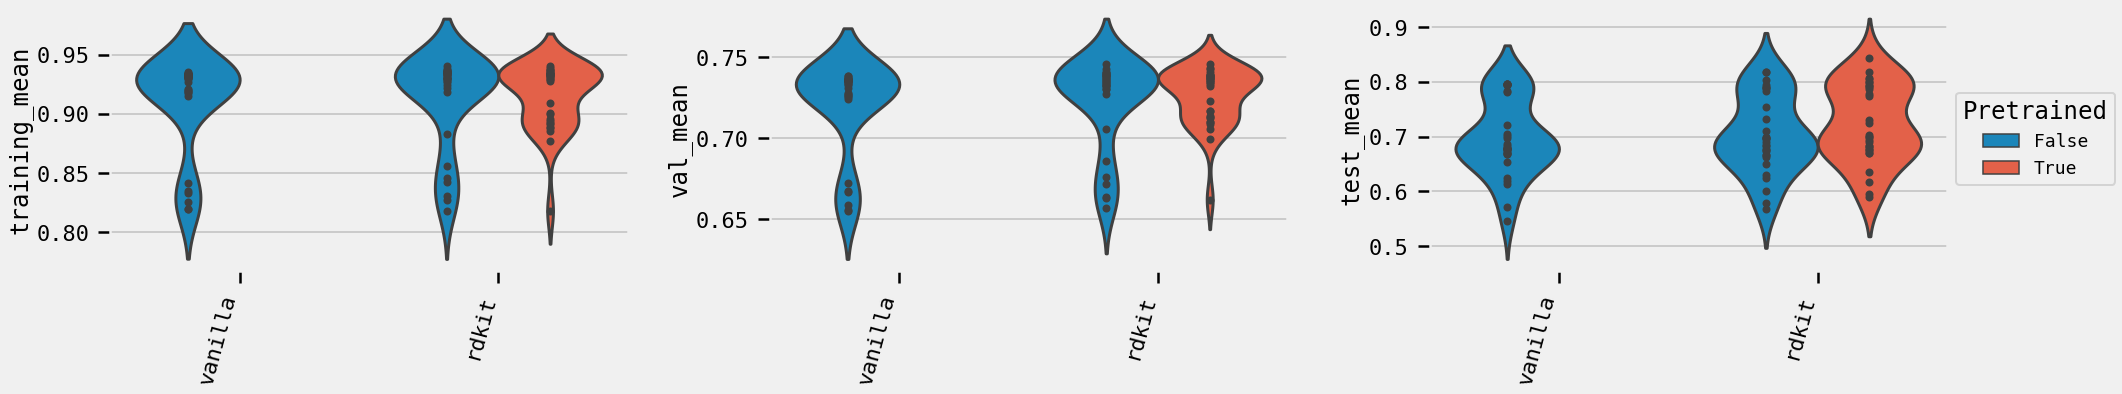

In [108]:
rows, cols = 1, 3
fig, ax = plt.subplots(rows, cols, figsize=(10 * cols, 6 * rows))

for i, y in enumerate(("result.training_mean", "result.val_mean", "result.test_mean")):
    sns.violinplot(
        data=results_clean,
        x="config.model.embedding.model",
        y=y,
        hue="config.model.load_pretrained",
        inner="points",
        ax=ax[i],
        scale="width",
    )
    # ax[i].set_ylim([0.3,1.01])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=75, ha="right")
    ax[i].set_xlabel("")
    ax[i].set_ylabel(y.split(".")[-1])
    ax[i].legend(title="Pretrained", loc="lower right", fontsize=18, title_fontsize=24)

ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].legend(
    title="Pretrained",
    fontsize=18,
    title_fontsize=24,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)
plt.tight_layout()

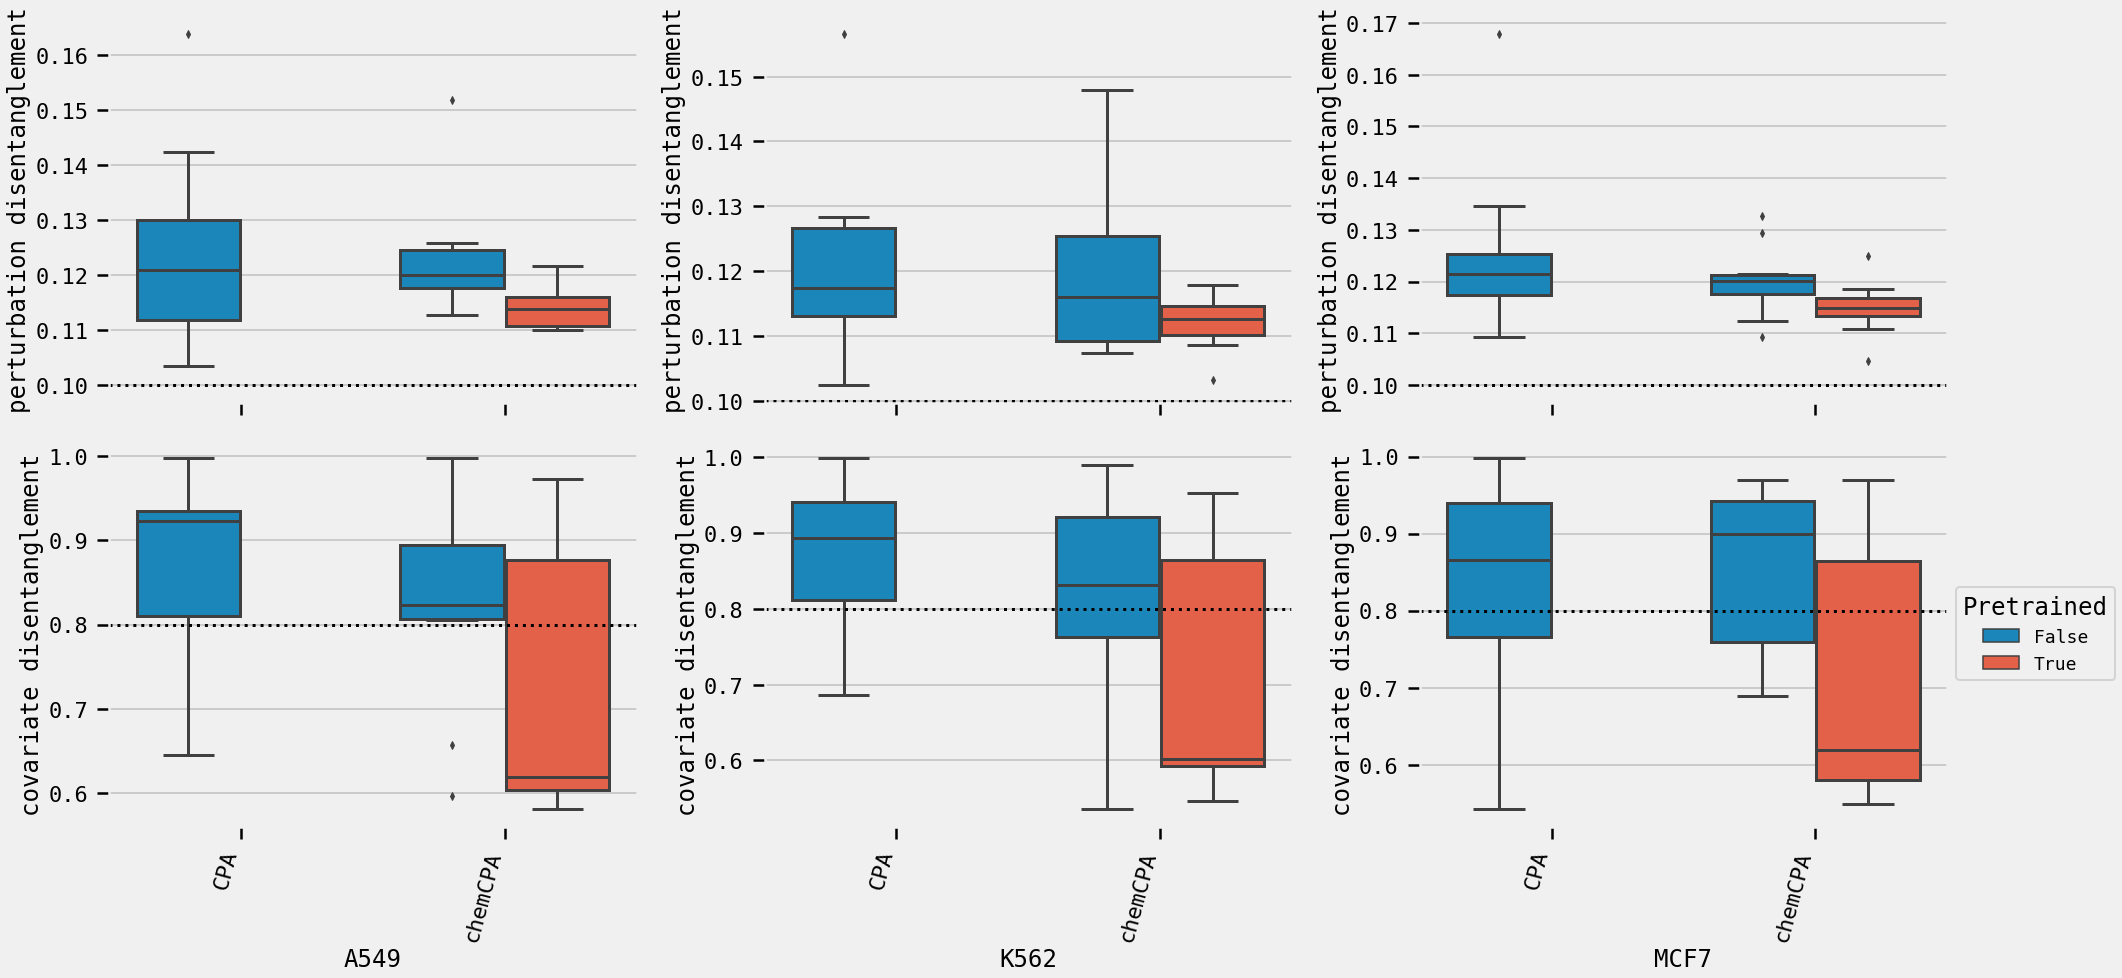

In [109]:
rows = 2
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(10 * cols, 7 * rows), sharex=True)

max_entangle = [0.1, 0.8]
for i, y in enumerate(
    ["result.perturbation disentanglement", "result.covariate disentanglement"]
    ):
    for j, (ct, df) in enumerate(results_clean.groupby("config.dataset.data_params.split_key")):
        sns.boxplot(
            data=df,
            x="config.model.embedding.model",
            y=y,
            # inner="point",
            # kind='violin',
            ax=ax[i,j],
            hue="config.model.load_pretrained",
        )
        axis = ax[i,j]
        # ax[i].set_ylim([0,1])
        axis.set_xticklabels(['CPA', 'chemCPA'])
        axis.set_xticklabels(axis.get_xticklabels(), rotation=75, ha="right")
        axis.axhline(max_entangle[i], ls=":", color="black")
        if i == 1:
            axis.set_xlabel(ct.split('_')[-1])
        else: 
            axis.set_xlabel("")

        axis.set_ylabel(y.split(".")[-1])
        axis.get_legend().remove()
ax[i,j].legend(
    title="Pretrained",
    fontsize=18,
    title_fontsize=24,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)
plt.tight_layout()

In [110]:
n_top = 1


def performance_condition(emb, pretrained, max_entangle, max_entangle_cov):
    cond = results_clean["config.model.embedding.model"] == emb
    cond = cond & (results_clean["result.perturbation disentanglement"] < max_entangle)
    cond = cond & (results_clean["result.covariate disentanglement"] < max_entangle_cov)
    cond = cond & (results_clean["config.model.load_pretrained"] == pretrained)
    return cond


best = []
for ct, df_ct in results_clean.groupby("config.dataset.data_params.split_key"):
    for embedding in list(results_clean["config.model.embedding.model"].unique()):
        for pretrained in [True, False]:
            df = df_ct[performance_condition(embedding, pretrained, 0.13, 0.69)]
            if len(df) == 0: 
                print(f"Combination {embedding} {'pretrained' if pretrained else ''} did not meet disentanglement condition.")
                df = df_ct[performance_condition(embedding, pretrained, 0.13, 1)]
                df = df.sort_values(by="result.covariate disentanglement", ascending=True).head(1)
            print(embedding, pretrained, len(df))
            best.append(
                df.sort_values(by="result.val_mean_de", ascending=False).head(n_top)
            )

best = pd.concat(best)

Combination vanilla pretrained did not meet disentanglement condition.
vanilla True 0
vanilla False 1
rdkit True 7
rdkit False 2
Combination vanilla pretrained did not meet disentanglement condition.
vanilla True 0
vanilla False 2
rdkit True 7
rdkit False 2
Combination vanilla pretrained did not meet disentanglement condition.
vanilla True 0
vanilla False 2
rdkit True 7
rdkit False 1


/home/icb/leon.hetzel/miniconda3/envs/chemical_CPA/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/icb/leon.hetzel/miniconda3/envs/chemical_CPA/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [111]:
pd.crosstab(best['config.dataset.data_params.split_key'], best['config.model.embedding.model'])

config.model.embedding.model,rdkit,vanilla
config.dataset.data_params.split_key,,
split_baseline_A549,2,1
split_baseline_K562,2,1
split_baseline_MCF7,2,1


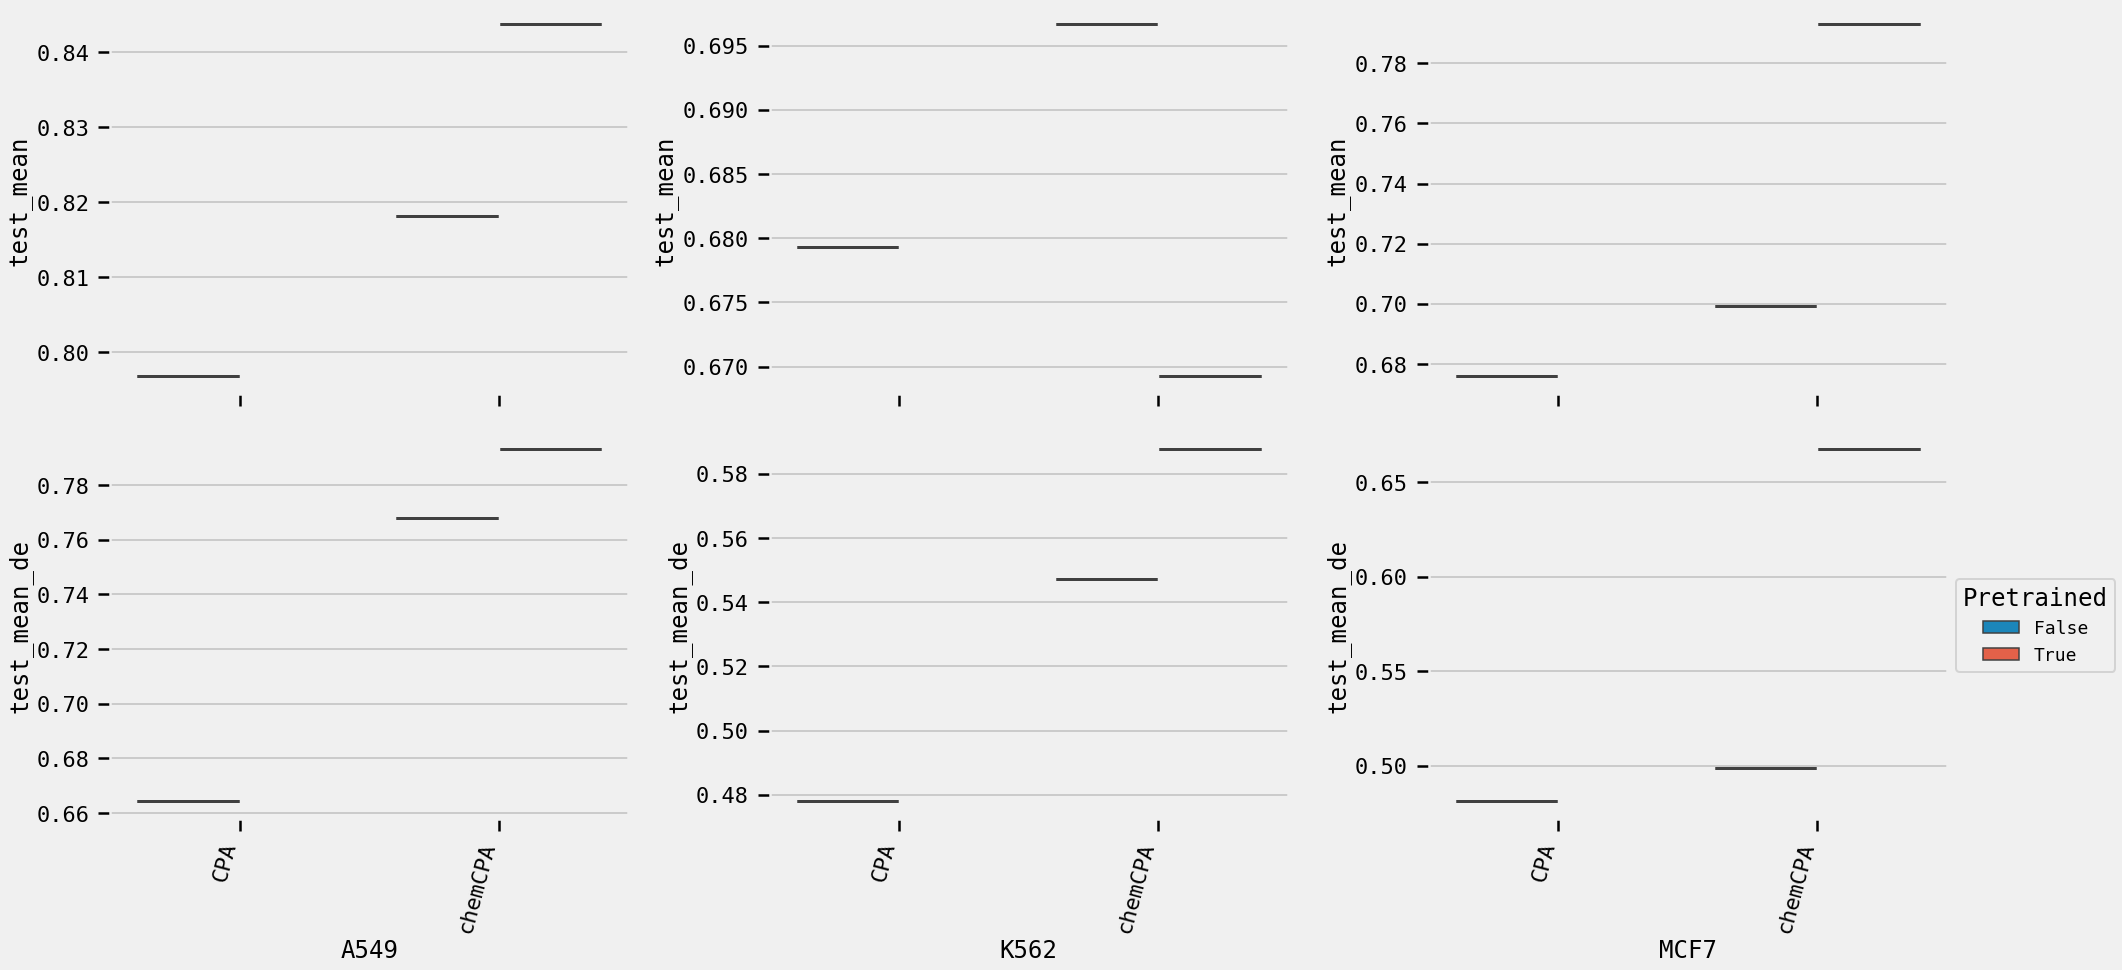

In [112]:
rows = 2
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(10 * cols, 7 * rows), sharex=True)

max_entangle = [0.1, 0.8]
for i, y in enumerate(
            ["result.test_mean",
        "result.test_mean_de",]
    ):
    for j, (ct, df) in enumerate(best.groupby("config.dataset.data_params.split_key")):
        sns.boxplot(
            data=df,
            x="config.model.embedding.model",
            y=y,
            # inner="point",
            # kind='violin',
            ax=ax[i,j],
            hue="config.model.load_pretrained",
        )
        axis = ax[i,j]
        # ax[i].set_ylim([0,1])
        axis.set_xticklabels(['CPA', 'chemCPA'])
        axis.set_xticklabels(axis.get_xticklabels(), rotation=75, ha="right")
        # axis.axhline(max_entangle[i], ls=":", color="black")
        if i == 1:
            axis.set_xlabel(ct.split('_')[-1])
        else: 
            axis.set_xlabel("")

        axis.set_ylabel(y.split(".")[-1])
        axis.get_legend().remove()
ax[i,j].legend(
    title="Pretrained",
    fontsize=18,
    title_fontsize=24,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)
plt.tight_layout()

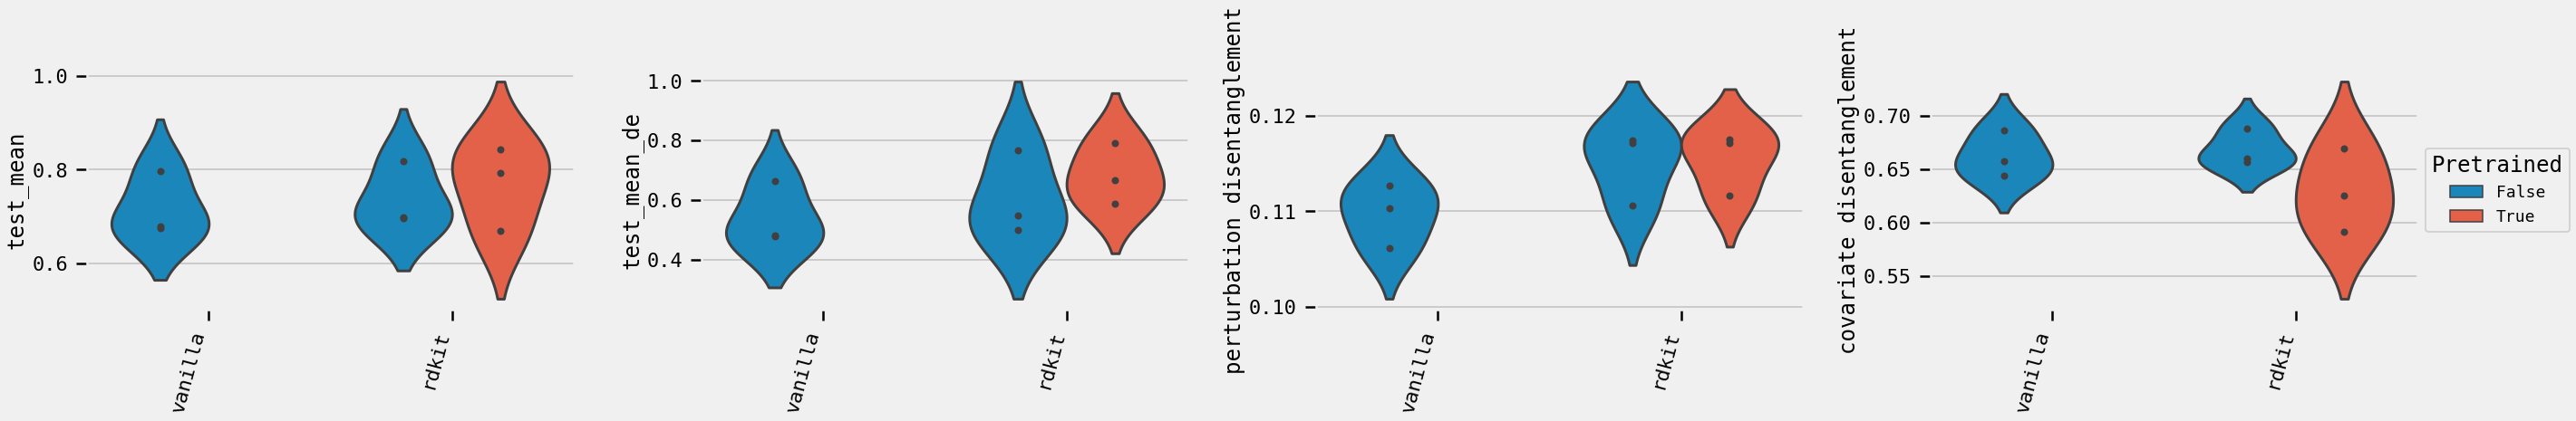

In [113]:
rows, cols = 1, 4
fig, ax = plt.subplots(rows, cols, figsize=(10 * cols, 6 * rows))

for i, y in enumerate(
    [
        "result.test_mean",
        "result.test_mean_de",
        "result.perturbation disentanglement",
        "result.covariate disentanglement",
    ]
):
    sns.violinplot(
        data=best,
        x="config.model.embedding.model",
        y=y,
        hue="config.model.load_pretrained",
        inner="points",
        ax=ax[i],
        scale="width",
    )
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=75, ha="right")
    ax[i].set_xlabel("")
    ax[i].set_ylabel(y.split(".")[-1])
    ax[i].legend(title="Pretrained", loc="lower right", fontsize=18, title_fontsize=24)
ax[0].get_legend().remove()
# ax[0].set_ylim([0.4, 1.01])
ax[1].get_legend().remove()
# ax[1].set_ylim([0.4, 1.01])
ax[2].get_legend().remove()
ax[3].legend(
    title="Pretrained",
    fontsize=18,
    title_fontsize=24,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)
plt.tight_layout()

In [114]:
cols = [
    'config.model.embedding.model',
    "config.model.load_pretrained",
    "config.dataset.data_params.split_key",
    "result.val_mean_de",
    "result.test_mean",
    "result.test_mean_de",
    "result.perturbation disentanglement",
    "result.covariate disentanglement",
    'config_hash'
]

best.loc[:, cols]

,config.model.embedding.model,config.model.load_pretrained,config.dataset.data_params.split_key,result.val_mean_de,result.test_mean,result.test_mean_de,result.perturbation disentanglement,result.covariate disentanglement,config_hash
9,vanilla,False,split_baseline_A549,0.740490,0.796837,0.664316,0.110348,0.644261,044c4dba0c8719985c3622834f2cbd58
30,rdkit,True,split_baseline_A549,0.763640,0.843732,0.793032,0.117478,0.669652,3326f900c45faaf99ca4400f78c58847
48,rdkit,False,split_baseline_A549,0.757339,0.818123,0.767883,0.117391,0.657043,8779ff45830000c6bc8e22023bb1cb2c
19,vanilla,False,split_baseline_K562,0.744223,0.679318,0.477948,0.106156,0.686293,5ea85d5dd7abd5962d1d3eeff1b8c1ff
50,rdkit,True,split_baseline_K562,0.766318,0.669244,0.587607,0.111611,0.591740,6388fa373386c11e40dceb5e2e8a113d
68,rdkit,False,split_baseline_K562,0.758748,0.696678,0.547135,0.110572,0.660317,34fd06018d6e2662ccd5da7a16b57334
29,vanilla,False,split_baseline_MCF7,0.743061,0.675943,0.481244,0.112676,0.657728,4d98e7d857f497d870e19c6d12175aaa
70,rdkit,True,split_baseline_MCF7,0.768464,0.792985,0.667422,0.117190,0.625767,2075a457bafdca5948ab671b77757974
88,rdkit,False,split_baseline_MCF7,0.746372,0.699372,0.498912,0.117100,0.688606,6ad52ba3939397521c5050ca1dd89a4c


In [115]:
print(best.loc[:, cols].to_markdown())

|    | config.model.embedding.model   | config.model.load_pretrained   | config.dataset.data_params.split_key   |   result.val_mean_de |   result.test_mean |   result.test_mean_de |   result.perturbation disentanglement |   result.covariate disentanglement | config_hash                      |
|---:|:-------------------------------|:-------------------------------|:---------------------------------------|---------------------:|-------------------:|----------------------:|--------------------------------------:|-----------------------------------:|:---------------------------------|
|  9 | vanilla                        | False                          | split_baseline_A549                    |             0.74049  |           0.796837 |              0.664316 |                              0.110348 |                           0.644261 | 044c4dba0c8719985c3622834f2cbd58 |
| 30 | rdkit                          | True                           | split_baseline_A549                    |     